#### Importing Libraries

In [1]:
# Suppress unnecessary warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

## Data Manipulation
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt 
from matplotlib.ticker import FuncFormatter
import seaborn as sns

# Display Utilities
from IPython.display import display
from tabulate import tabulate



## Loading the DataSet

In [2]:
Df = pd.read_csv("retail_sales_dataset.csv")
Df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


## Data Cleaning

In [3]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [4]:
## Checking for missing value

# counting missing values per column
missing_values = Df.isnull().sum()

# Display results
print("\n🔍 Missing Values Check:")
print(missing_values)

if missing_values.sum() == 0:
    print("no missing values detected.")
else:
     print("missing values found- need cleaninig before analysis.")


🔍 Missing Values Check:
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64
no missing values detected.


In [5]:
# fixing Data Type


## Convert "date" Column from object ( string) to datetime
# This enables time-based analysis ( monthly trends, seasonality, etc)

Df['Date'] = pd.to_datetime(Df['Date'])
print(Df['Date'].head())

0   2023-11-24
1   2023-02-27
2   2023-01-13
3   2023-05-21
4   2023-05-06
Name: Date, dtype: datetime64[ns]


In [6]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


In [7]:
## Unique Value per column

unique_counts = Df.nunique()
print(unique_counts)

Transaction ID      1000
Date                 345
Customer ID         1000
Gender                 2
Age                   47
Product Category       3
Quantity               4
Price per Unit         5
Total Amount          18
dtype: int64


In [8]:
Total_revenue = Df["Total Amount"].sum()
Total_Transaction = Df['Transaction ID'].sum()
Avg_Transaction_value = Df['Total Amount'].mean()


print(f"Total Revenue: ${Total_revenue:,.2f}")
print(f"Total Transactions: {Total_Transaction}")
print(f"Average Transaction Value: ${Avg_Transaction_value:,.2f}")

Total Revenue: $456,000.00
Total Transactions: 500500
Average Transaction Value: $456.00


In [9]:
# Get Ranges for customer demographic & Spending
Min_age = Df['Age'].min()
Max_age = Df['Age'].max()
Min_price_per_unit = Df['Age'].min()
Max_price_per_unit = Df['Age'].max()
Min_transaction_amount = Df.groupby ('Transaction ID')['Total Amount'].sum().min()
Max_transaction_amount = Df.groupby ('Transaction ID')['Total Amount'].sum().max()
print(f"Min_age: {Min_age}")
print(f"Max_age: {Max_age}")
print(f"Min_price_per_unit: {Min_price_per_unit}")
print(f"Max_price_per_unit: {Max_price_per_unit}")
print(f"Min_transaction_amount: {Min_transaction_amount}")
print(f"Max_transaction_amount: {Max_transaction_amount}")

Min_age: 18
Max_age: 64
Min_price_per_unit: 18
Max_price_per_unit: 64
Min_transaction_amount: 25
Max_transaction_amount: 2000


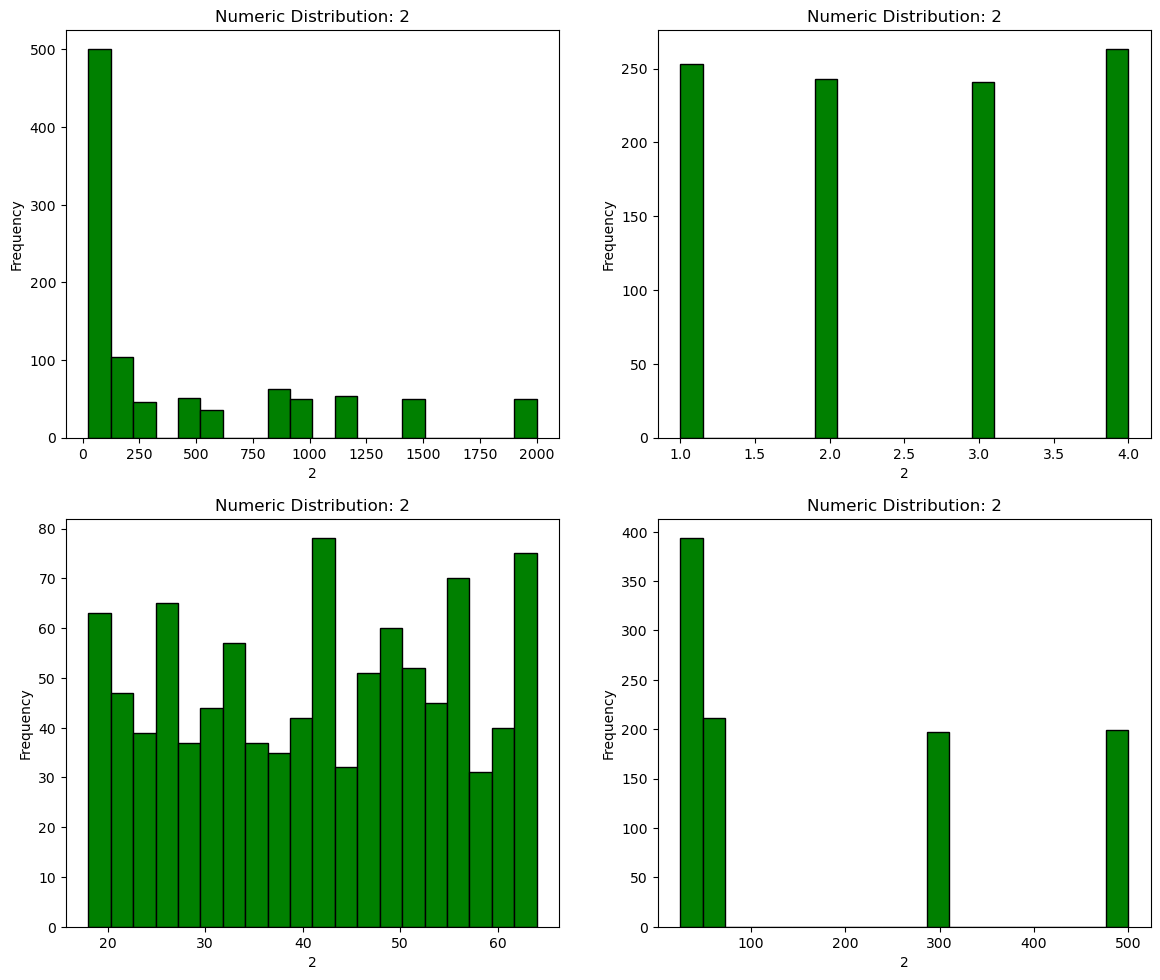

In [10]:
# Purpose: Exploring numeric and Categorical distribution to spot patterns


# Column Grouping 
numeric_cols = ['Total Amount','Quantity', 'Age','Price per Unit']
categorical_cols = ['Gender', 'Product Category']

# Plotting Distributions
# histograms for all numeric columns in the dataset to analyze their distributions.
total_plots = len(numeric_cols) + len(categorical_cols)
cols = 2
rows = (total_plots + 1) // cols 
plt.figure(figsize=(14, 6*rows))

# Numeric distributions (histograms)
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, cols, i)
    plt.hist(Df[col].dropna(), bins=20, color='green', edgecolor='black')
    plt.title(f'Numeric Distribution: {cols}')
    plt.xlabel(cols)
    plt.ylabel('Frequency')




(0.0, 612.0)

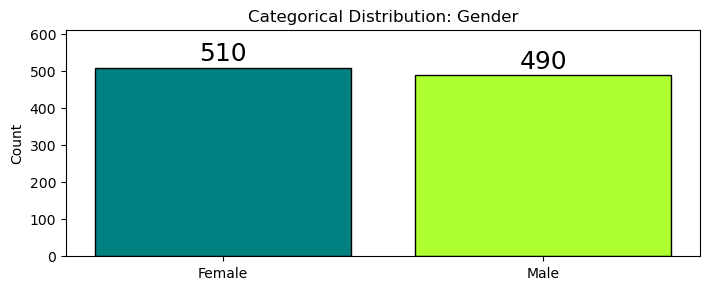

In [11]:
# Gender 
plt.figure(figsize=(18, 10))
plt.subplot(rows, cols, len(numeric_cols)+1)
gender_counts = Df['Gender'].value_counts()
colors = ['#008080', '#adff2f']  # Blue for Male, Orange for Female (adjust as needed)
bars = plt.bar(gender_counts.index, gender_counts.values, color=colors, edgecolor='black')
plt.title('Categorical Distribution: Gender')
plt.ylabel('Count')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5, str(int(height)), ha='center', va='bottom',fontsize= 18)

ax = plt.gca()
max_height = gender_counts.max()
ax.set_ylim(0, max_height * 1.2)  # add 20% space at the top


(0.0, 612.0)

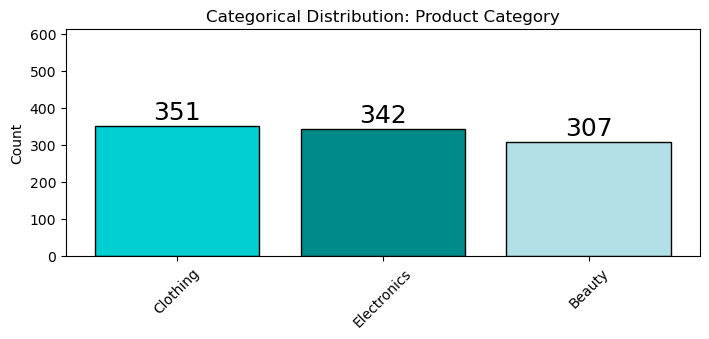

In [12]:
# Categorical: Product Category
plt.figure(figsize=(18, 10))
plt.subplot(rows, cols, len(numeric_cols)+2)
product_counts = Df['Product Category'].value_counts()
colors = ['#00ced1', '#008b8b', '#b0e0e6']  # Different colors per category
bars = plt.bar(product_counts.index, product_counts.values, color=colors, edgecolor='black')
plt.title('Categorical Distribution: Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5, str(int(height)), ha='center', va='bottom',fontsize= 18)

ax = plt.gca()
max_height = gender_counts.max()
ax.set_ylim(0, max_height * 1.2)  # add 20% space at the top

## Most Valuable Customer 

In [13]:
# Summarizing revenue & transaction statistics per customer

customer_summary = Df.groupby('Customer ID').agg(
    Total_Revenue=('Total Amount', 'sum'),
    Total_Transactions=('Transaction ID', 'nunique'),
    Avg_Transaction_Value=('Total Amount', 'mean'),
    Total_Quantity=('Quantity', 'sum'),
    Age=('Age', 'first'),  # Assuming age is same per customer
    Gender=('Gender', 'first'),  # Assuming gender is same per customer
    Top_Product_Category=('Product Category', lambda x: x.mode()[0])  # Most frequent product category
).reset_index()
customer_summary

,Customer ID,Total_Revenue,Total_Transactions,Avg_Transaction_Value,Total_Quantity,Age,Gender,Top_Product_Category
0,CUST001,150,1,150.0,3,34,Male,Beauty
1,CUST002,1000,1,1000.0,2,26,Female,Clothing
2,CUST003,30,1,30.0,1,50,Male,Electronics
3,CUST004,500,1,500.0,1,37,Male,Clothing
4,CUST005,100,1,100.0,2,30,Male,Beauty
...,...,...,...,...,...,...,...,...
995,CUST995,30,1,30.0,1,41,Female,Clothing
996,CUST996,50,1,50.0,1,62,Male,Clothing
997,CUST997,90,1,90.0,3,52,Male,Beauty
998,CUST998,100,1,100.0,4,23,Female,Beauty


In [14]:
# Extracting top 10 customers by revenue

top_customers = customer_summary.sort_values(by='Total_Revenue', ascending=False).head(10)


print(" Top 10 Customers by Revenue")
display(top_customers[['Customer ID', 'Gender', 'Age', 'Top_Product_Category', 
                       'Total_Transactions', 'Total_Quantity', 'Total_Revenue', 'Avg_Transaction_Value']])


 Top 10 Customers by Revenue


,Customer ID,Gender,Age,Top_Product_Category,Total_Transactions,Total_Quantity,Total_Revenue,Avg_Transaction_Value
487,CUST487,Male,44,Clothing,1,4,2000,2000.0
476,CUST476,Female,27,Clothing,1,4,2000,2000.0
773,CUST773,Male,25,Electronics,1,4,2000,2000.0
503,CUST503,Male,45,Beauty,1,4,2000,2000.0
92,CUST093,Female,35,Beauty,1,4,2000,2000.0
88,CUST089,Female,55,Electronics,1,4,2000,2000.0
946,CUST946,Male,62,Electronics,1,4,2000,2000.0
157,CUST157,Male,62,Electronics,1,4,2000,2000.0
155,CUST155,Male,31,Electronics,1,4,2000,2000.0
420,CUST420,Female,22,Clothing,1,4,2000,2000.0


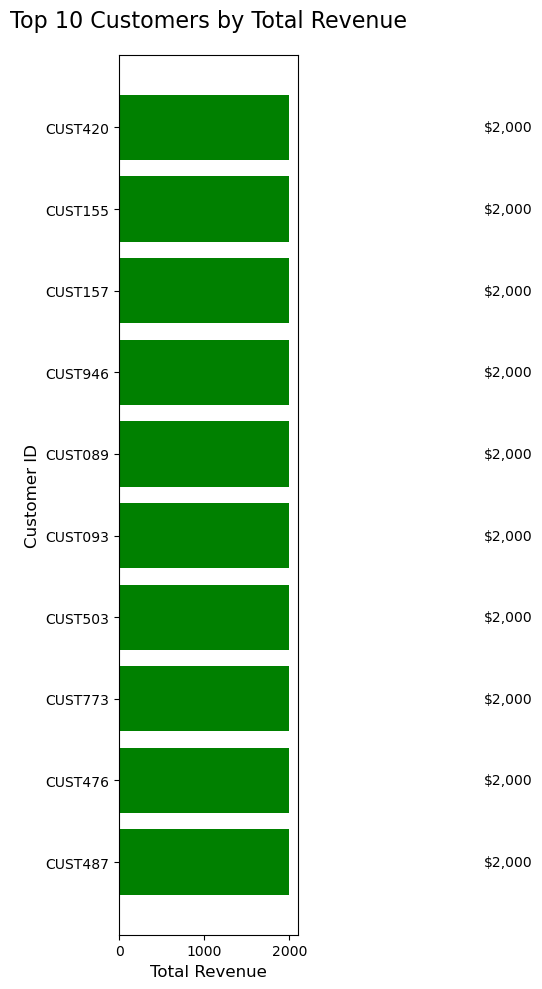

In [15]:
# Visualize them with a Bar Chart

top_customers_sorted = top_customers.sort_values(by='Total_Revenue', ascending=True)

fig, ax = plt.subplots(figsize=(18,10))
bars = ax.barh(
    top_customers_sorted['Customer ID'],
    top_customers_sorted['Total_Revenue'],
    color='green'
)

# Add labels showing revenue value at bar ends
for bar in bars:
    width = bar.get_width()
    ax.text(
        width + Total_revenue*0.005,
        bar.get_y() + bar.get_height()/2,
        f"${width:,.0f}",
        ha='left',
        va='center',
        fontsize=10
    )

ax.set_title('Top 10 Customers by Total Revenue', fontsize=16, pad=20)
ax.set_xlabel('Total Revenue', fontsize=12)
ax.set_ylabel('Customer ID', fontsize=12)
plt.tight_layout()
plt.show()



#### How does customer age and gender influence purchasing behavior?

In [16]:
# Exploring spending patterns by age


# Aggregate revenue and transactions by age
age_summary = Df.groupby('Age').agg(
    Total_Revenue=('Total Amount', 'sum'),
    Total_Transactions=('Transaction ID', 'nunique'),
    Avg_Transaction_Value=('Total Amount', 'mean'),
    Num_Customers=('Customer ID', 'nunique')
).reset_index()

In [17]:
# Step 2: Extract top 10 ages by revenue
top_age_summary = age_summary.sort_values(by='Total_Revenue', ascending=False).head(10)
print(" Top 10 Ages by Total Revenue")
display(top_age_summary)

 Top 10 Ages by Total Revenue


,Age,Total_Revenue,Total_Transactions,Avg_Transaction_Value,Num_Customers
25,43,17970,31,579.677419,31
16,34,16785,28,599.464286,28
33,51,16065,30,535.500000,30
1,19,14870,21,708.095238,21
8,26,13980,22,635.454545,22
4,22,13700,27,507.407407,27
28,46,13090,25,523.600000,25
3,21,12585,20,629.250000,20
29,47,12505,26,480.961538,26
19,37,11650,16,728.125000,16


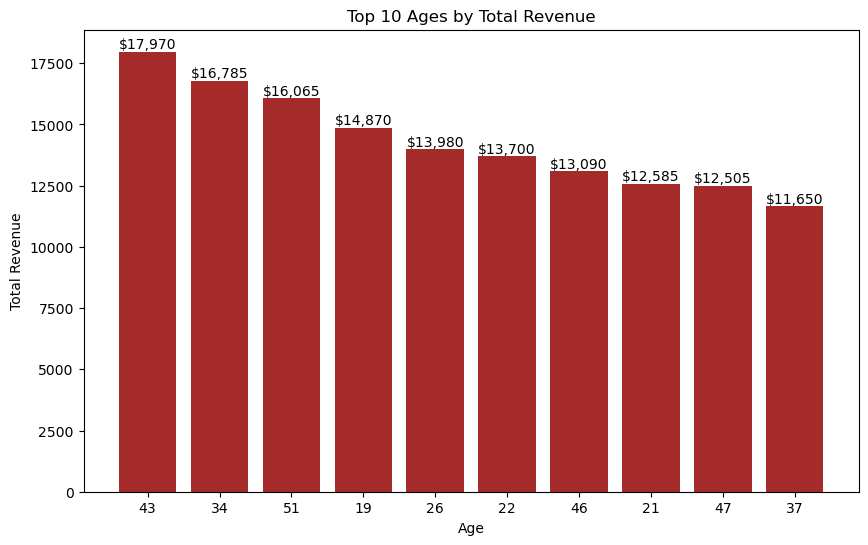

In [18]:
plt.figure(figsize=(10,6))
bars = plt.bar(top_age_summary['Age'].astype(str), top_age_summary['Total_Revenue'], color='#a52a2a')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"${bar.get_height():,.0f}", ha='center', va='bottom', fontsize=10)
plt.title('Top 10 Ages by Total Revenue')
plt.xlabel('Age')
plt.ylabel('Total Revenue')
plt.show()

Spending Summary by Gender


,Gender,Total_Revenue,Total_Transactions,Avg_Transaction_Value,Num_Customers
0,Female,232840,510,456.549020,510
1,Male,223160,490,455.428571,490


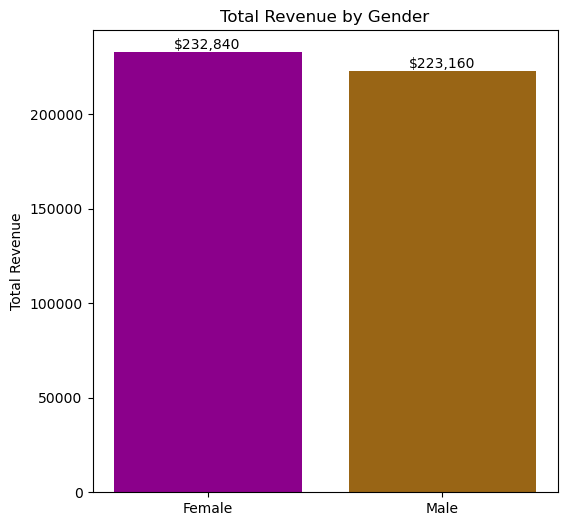

In [19]:
gender_summary = Df.groupby('Gender').agg(
    Total_Revenue=('Total Amount', 'sum'),
    Total_Transactions=('Transaction ID', 'nunique'),
    Avg_Transaction_Value=('Total Amount', 'mean'),
    Num_Customers=('Customer ID', 'nunique')
).reset_index()

# Step 2: Display table
print("Spending Summary by Gender")
display(gender_summary)

# Step 3: Visualize with bar chart
plt.figure(figsize=(6,6))
colors = ['#8b008b' if g=='Female' else '#996515' for g in gender_summary['Gender']]
bars = plt.bar(gender_summary['Gender'], gender_summary['Total_Revenue'], color=colors)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"${bar.get_height():,.0f}", ha='center', va='bottom', fontsize=10)
plt.title('Total Revenue by Gender')
plt.ylabel('Total Revenue')
plt.show()


#### Spending by Age & Gender (stacked Bar)

In [20]:

# Step 1: Aggregate by age + gender
age_gender_summary = Df.groupby(['Age','Gender']).agg(
    Total_Revenue=('Total Amount', 'sum'),
    Total_Transactions=('Transaction ID', 'nunique'),
    Avg_Transaction_Value=('Total Amount', 'mean'),
    Num_Customers=('Customer ID', 'nunique')
).reset_index()




In [21]:
#Show top 10 age-gender combos by revenue
print(" Age & Gender Combinations by Total Revenue")
top_age_gender_table = age_gender_summary.sort_values(by='Total_Revenue', ascending=False).head(10)
display(top_age_gender_table)




 Age & Gender Combinations by Total Revenue


,Age,Gender,Total_Revenue,Total_Transactions,Avg_Transaction_Value,Num_Customers
32,34,Female,12050,14,860.714286,14
16,26,Female,10375,15,691.666667,15
50,43,Female,10260,19,540.000000,19
67,51,Male,8795,13,676.538462,13
9,22,Male,8275,13,636.538462,13
27,31,Male,8200,16,512.500000,16
91,63,Male,8045,11,731.363636,11
0,18,Female,7940,13,610.769231,13
57,46,Male,7710,9,856.666667,9
51,43,Male,7710,12,642.500000,12


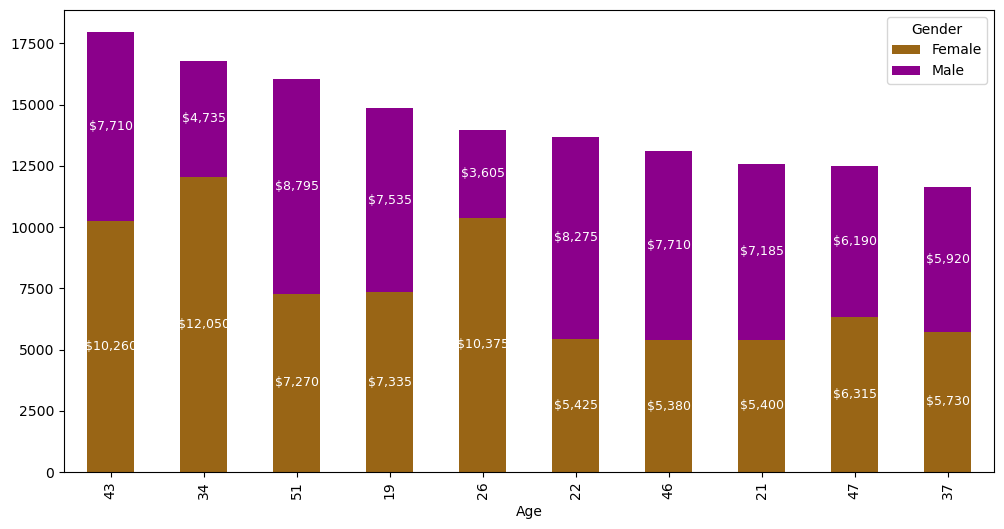

In [22]:
# Step 3: Prepare data for stacked bar chart
stacked_data = age_gender_summary.pivot(index='Age', columns='Gender', values='Total_Revenue')
top_ages = stacked_data.sum(axis=1).sort_values(ascending=False).head(10).index
stacked_data_top = stacked_data.loc[top_ages]

# Step 4: Visualize stacked bar chart
fig, ax = plt.subplots(figsize=(12,6))
stacked_data_top.plot(kind='bar', stacked=True, ax=ax, color=['#996515', '#8b008b'])

# Add labels inside the bars
for i, age in enumerate(stacked_data_top.index):
    bottom = 0
    for gender in stacked_data_top.columns:
        val = stacked_data_top.loc[age, gender]
        ax.text(i, bottom + val/2, f"${val:,.0f}", ha='center', va='center', fontsize=9, color='white')
        bottom += val


## Product Categories that drive the most revenue

In [23]:
# Aggregate revenue, customer count, and average transaction value per product
product_summary = Df.groupby('Product Category').agg(
    Total_Revenue=('Total Amount', 'sum'),
    Number_of_Customers=('Customer ID', 'nunique'),
    Avg_Transaction_Value=('Total Amount','mean')
).reset_index()

In [24]:
product_summary = product_summary.sort_values(by='Total_Revenue', ascending=False)
print("Revenue, Number of Customers, and Average Transaction Value per Product Category")
display(product_summary)

Revenue, Number of Customers, and Average Transaction Value per Product Category


,Product Category,Total_Revenue,Number_of_Customers,Avg_Transaction_Value
2,Electronics,156905,342,458.786550
1,Clothing,155580,351,443.247863
0,Beauty,143515,307,467.475570


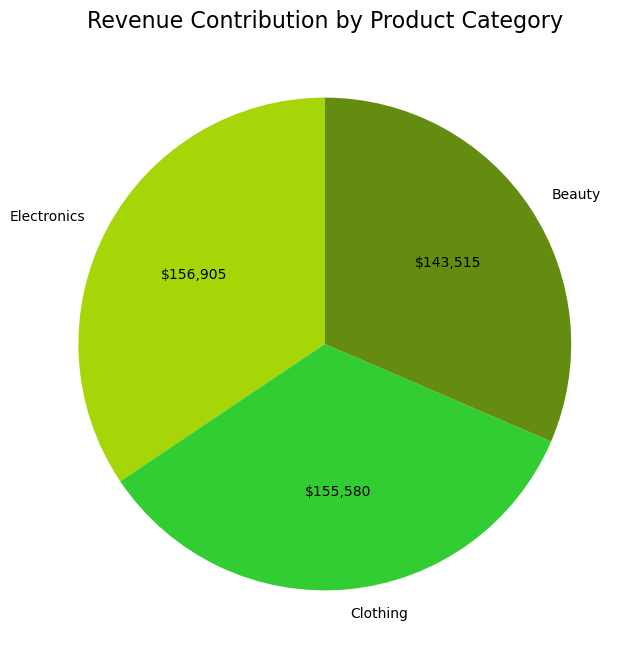

In [25]:

# Step 4: Visualize revenue distribution as a pie chart
fig, ax = plt.subplots(figsize=(8,8))
ax.pie(
    product_summary['Total_Revenue'],
    labels=product_summary['Product Category'],
    autopct=lambda p: f"${p*product_summary['Total_Revenue'].sum()/100:,.0f}",
    colors=['#a6d608','#32cd32','#648c11'],
    startangle=90
)
ax.set_title('Revenue Contribution by Product Category', fontsize=16)
plt.show()

,Product Category,Gender,Total_Revenue,Number_of_Customers,Avg_Transaction_Value
2,Clothing,Female,81275,174,467.097701
5,Electronics,Male,80170,172,466.104651
4,Electronics,Female,76735,170,451.382353
0,Beauty,Female,74830,166,450.783133
3,Clothing,Male,74305,177,419.802260
1,Beauty,Male,68685,141,487.127660


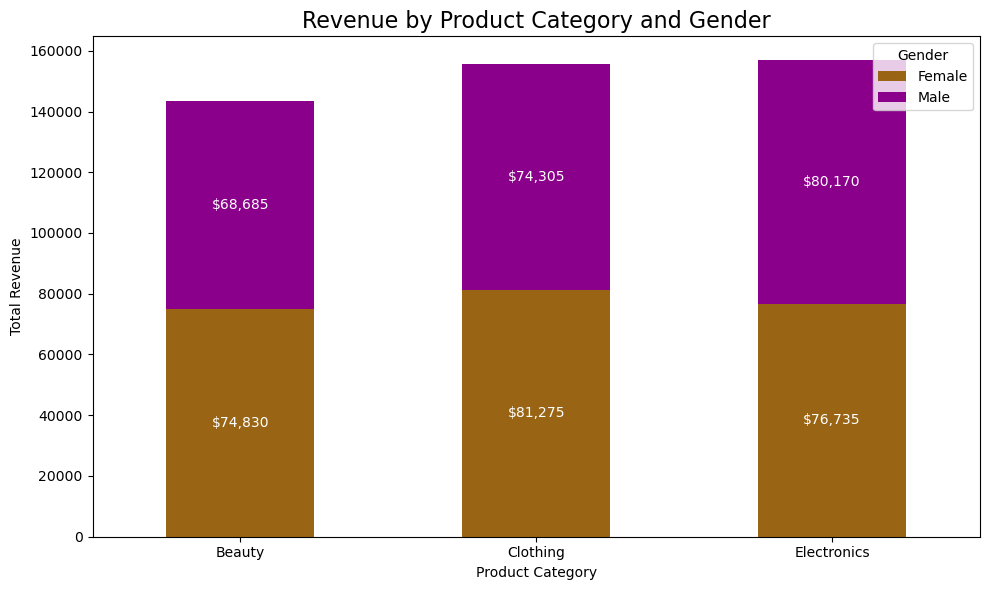


Revenue, Number of Customers, and Average Transaction Value by Product Category & Gender


In [26]:
#Revenue by Product Category & Gender

# Aggregate revenue and customer count per product & gender
product_gender_summary = Df.groupby(['Product Category','Gender']).agg(
    Total_Revenue=('Total Amount','sum'),
    Number_of_Customers=('Customer ID','nunique'),
    Avg_Transaction_Value=('Total Amount','mean')
).reset_index()

# stacked bar chart
stacked_product_gender = product_gender_summary.pivot(index='Product Category', columns='Gender', values='Total_Revenue')

# Visualize revenue split by gender for each product
fig, ax = plt.subplots(figsize=(10,6))
stacked_product_gender.plot(kind='bar', stacked=True, ax=ax, color=['#996515', '#8b008b'])

display(product_gender_summary.sort_values(by='Total_Revenue', ascending=False))
# Add labels inside bars
for i, product in enumerate(stacked_product_gender.index):
    bottom = 0
    for gender in stacked_product_gender.columns:
        val = stacked_product_gender.loc[product, gender]
        ax.text(i, bottom + val/2, f"${val:,.0f}", ha='center', va='center', fontsize=10, color='white')
        bottom += val

ax.set_title('Revenue by Product Category and Gender', fontsize=16)
ax.set_ylabel('Total Revenue')
ax.set_xlabel('Product Category')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#Display table with heading
print()
print("Revenue, Number of Customers, and Average Transaction Value by Product Category & Gender")


####  Age & Gender Combinations per Product

In [27]:

#Aggregate revenue per product, age, and gender
age_gender_product_summary = Df.groupby(['Product Category','Age','Gender']).agg(
    Total_Revenue=('Total Amount','sum'),
    Number_of_Customers=('Customer ID','nunique')
).reset_index()



In [28]:
# Extract top 3 age/gender combos for each product
top3_age_gender_per_product = age_gender_product_summary.groupby('Product Category').apply(
    lambda x: x.sort_values(by='Total_Revenue', ascending=False).head(3)
).reset_index(drop=True)

print()
print("Table 3C: Top 3 Age & Gender Combinations by Revenue per Product")
display(top3_age_gender_per_product.sort_values(by=['Product Category','Total_Revenue'], ascending=[True, False]))


Table 3C: Top 3 Age & Gender Combinations by Revenue per Product


,Product Category,Age,Gender,Total_Revenue,Number_of_Customers
0,Beauty,46,Male,6160,6
1,Beauty,34,Female,5350,7
2,Beauty,21,Male,4700,4
3,Clothing,26,Female,6960,7
4,Clothing,64,Female,4735,10
5,Clothing,43,Female,4175,7
6,Electronics,63,Male,5675,7
7,Electronics,34,Female,5400,5
8,Electronics,43,Male,5350,5


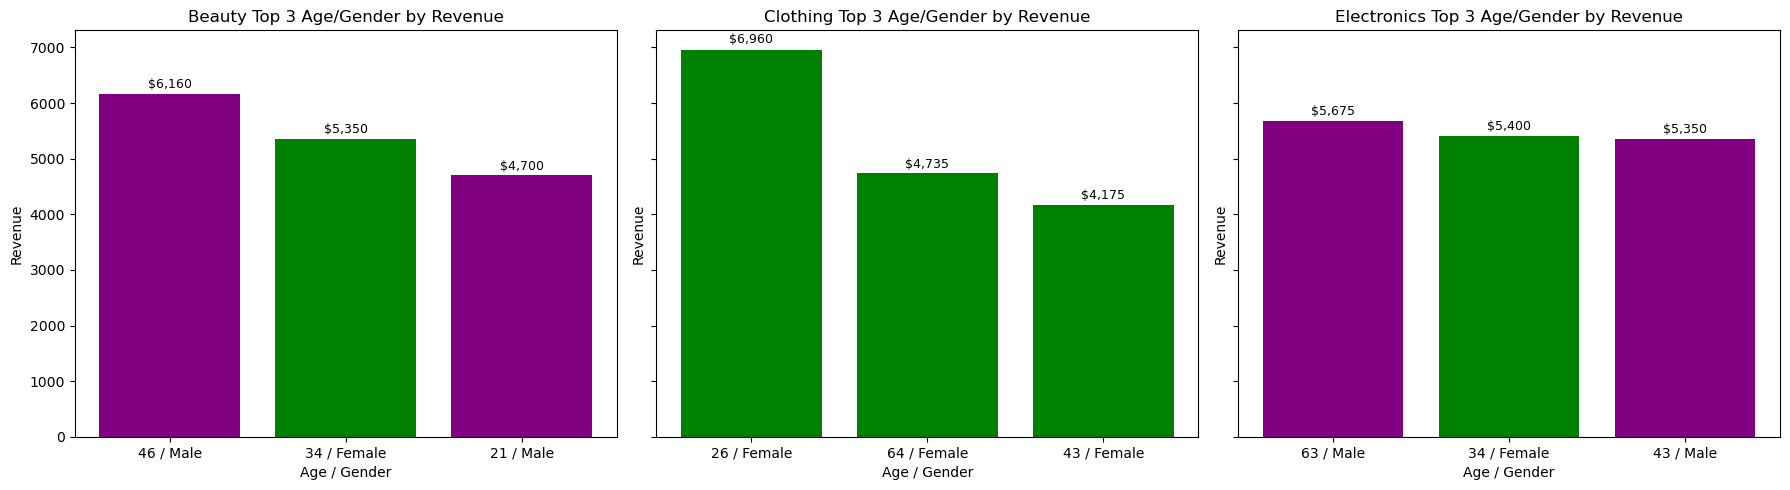

In [29]:
# Grouped bar chart per product
fig, axs = plt.subplots(1, 3, figsize=(18,5), sharey=True)

for i, product in enumerate(top3_age_gender_per_product['Product Category'].unique()):
    data = top3_age_gender_per_product[top3_age_gender_per_product['Product Category']==product]
    labels = data['Age'].astype(str) + ' / ' + data['Gender']
    axs[i].bar(labels, data['Total_Revenue'], color=['Green' if g=='Female' else 'Purple' for g in data['Gender']])
    axs[i].set_title(f"{product} Top 3 Age/Gender by Revenue")
    axs[i].set_xlabel('Age / Gender')
    axs[i].set_ylabel('Revenue')
    for idx, val in enumerate(data['Total_Revenue']):
        axs[i].text(idx, val + val*0.01, f"${val:,.0f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

##### Monthly Sales and Transaction

In [32]:
# Aggregate Monthly sales Metric 

# Extract Month from the transaction Date

Df['Month'] = Df['Date'].dt.month

In [41]:
# Aggregate revenue & transaction by month

Monthly_sales = Df.groupby('Month').agg(
    Total_Revenue=('Total Amount', 'sum'),
    Total_Transaction=('Transaction ID','nunique')).reset_index()

In [44]:
# Average Transaction Value 
Monthly_sales['Avg_Transaction_Value'] = Monthly_sales['Total_Revenue'] / Monthly_sales['Total_Transaction']
print("Monthly Sales Table")
display(Monthly_sales)

Monthly Sales Table


,Month,Total_Revenue,Total_Transaction,Avg_Transaction_Value
0,1,36980,78,474.102564
1,2,44060,85,518.352941
2,3,28990,73,397.123288
3,4,33870,86,393.837209
4,5,53150,105,506.190476
5,6,36715,77,476.818182
6,7,35465,72,492.569444
7,8,36960,94,393.191489
8,9,23620,65,363.384615
9,10,46580,96,485.208333


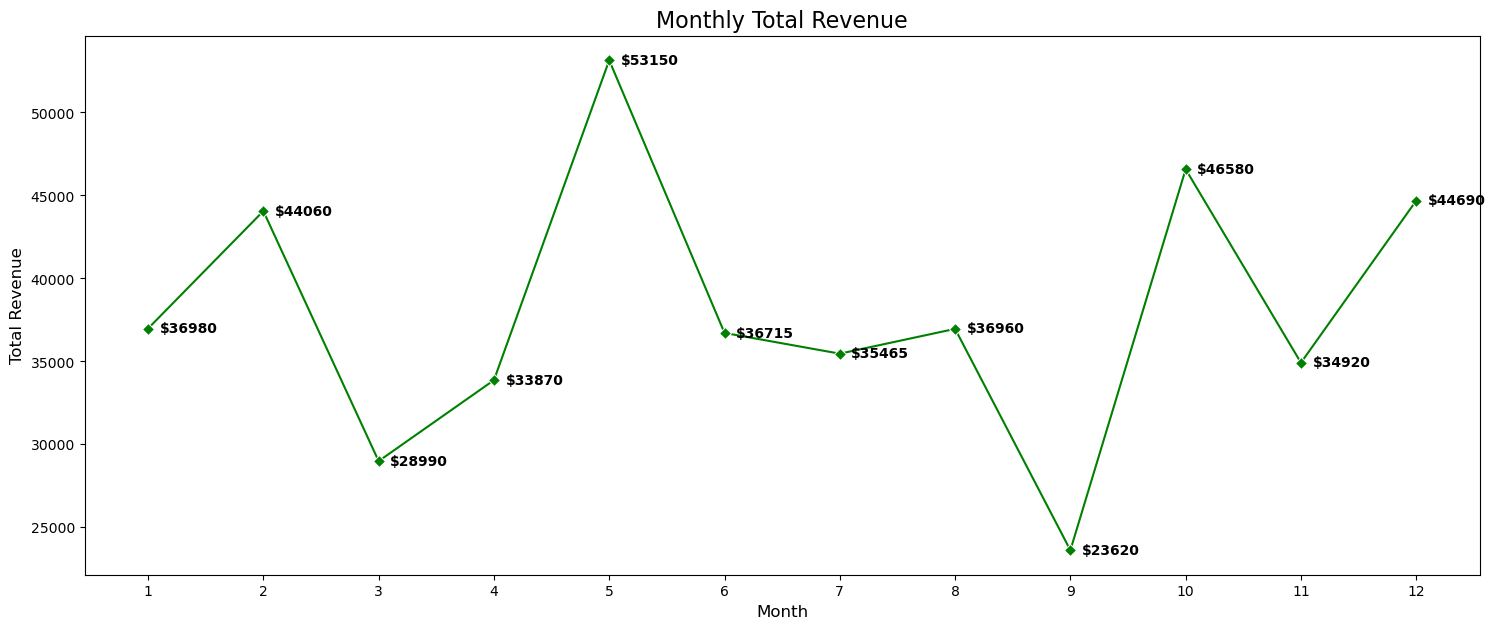

In [54]:
# The Monthly Revenue 
plt.figure(figsize=(18,7))
sns.lineplot(data=Monthly_sales, x='Month', y='Total_Revenue', marker='D', color='green')
plt.title('Monthly Total Revenue', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(Monthly_sales['Month'])
plt.grid(False)

for x, y in zip(Monthly_sales['Month'], Monthly_sales['Total_Revenue']):
    plt.text(
        x + 0.1,        # shift right (adjust if needed)
        y,
        f'${y:.0f}',
        ha='left',
        va='center',
        fontsize=10,
        fontweight='bold',
        color='black'
    )

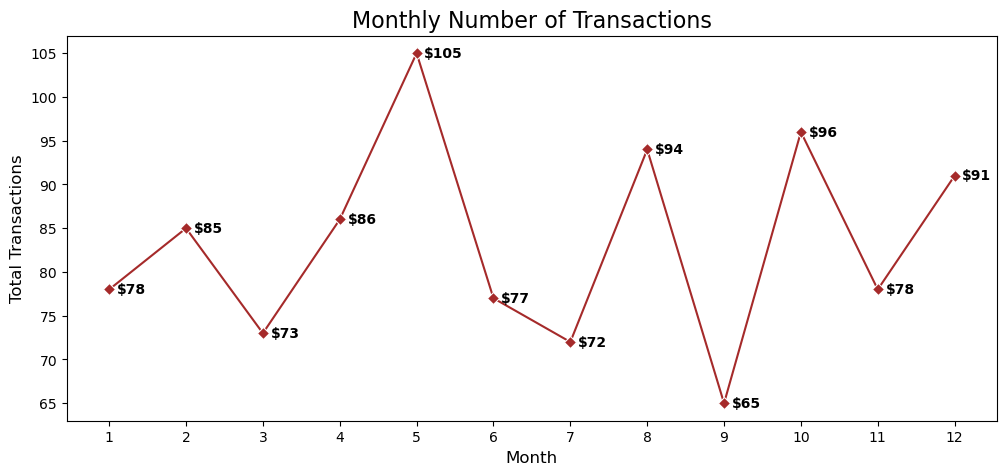

In [59]:
# Montly Transaction

plt.figure(figsize=(12,5))
sns.lineplot(data=Monthly_sales, x='Month', y='Total_Transaction', marker='D', color='Brown')
plt.title('Monthly Number of Transactions', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Transactions', fontsize=12)
plt.xticks(Monthly_sales['Month'])
plt.grid(False)


for x, y in zip(Monthly_sales['Month'], Monthly_sales['Total_Transaction']):
    plt.text(
        x + 0.1,        # shift right (adjust if needed)
        y,
        f'${y:.0f}',
        ha='left',
        va='center',
        fontsize=10,
        fontweight='bold',
        color='black'
    )


In [62]:
# seaborn Style for simplicity

sns.set_style("whitegrid")

In [66]:
Avg_quantity = Df['Quantity'].mean()

print(f"Average Quantity per Transaction: {Avg_quantity:.2f}")

Average Quantity per Transaction : 2.51


In [68]:

avg_quantity_by_product = Df.groupby('Product Category')['Quantity'].mean().reset_index()
print()
print("Table 5A: Average Quantity per Transaction by Product Category:")
display(avg_quantity_by_product)



Table 5A: Average Quantity per Transaction by Product Category:


,Product Category,Quantity
0,Beauty,2.511401
1,Clothing,2.547009
2,Electronics,2.482456


In [71]:
# group Average Quantity by Month & Product Categories

avg_qty_month_product = Df.groupby(['Month','Product Category']).agg(
    Avg_Quantity=('Quantity', 'mean')
).reset_index()


# Pivot table: Months as rows, Products as columns, values = Avg_Quantity
avg_qty_pivot = avg_qty_month_product.pivot(
    index='Month',
    columns='Product Category',
    values='Avg_Quantity'
)


In [79]:
# checking for missing values

avg_qty_pivot.isnull()

# checking my values 
avg_qty_pivot

# Fill missing values with 0 (if any) and round to 2 decimals
avg_qty_pivot = avg_qty_pivot.fillna(0).round(2)

print(" Average Quantity per Transaction by Product and Month")
display(avg_qty_pivot)


 Average Quantity per Transaction by Product and Month


Product Category,Beauty,Clothing,Electronics
Month,,,
1,2.38,2.77,2.50
2,2.62,2.27,2.73
3,2.43,2.92,2.29
4,2.38,2.58,2.48
5,2.32,2.62,2.42
6,2.64,2.39,2.67
7,2.59,2.37,2.35
8,2.58,2.44,2.29
9,2.50,3.00,2.40


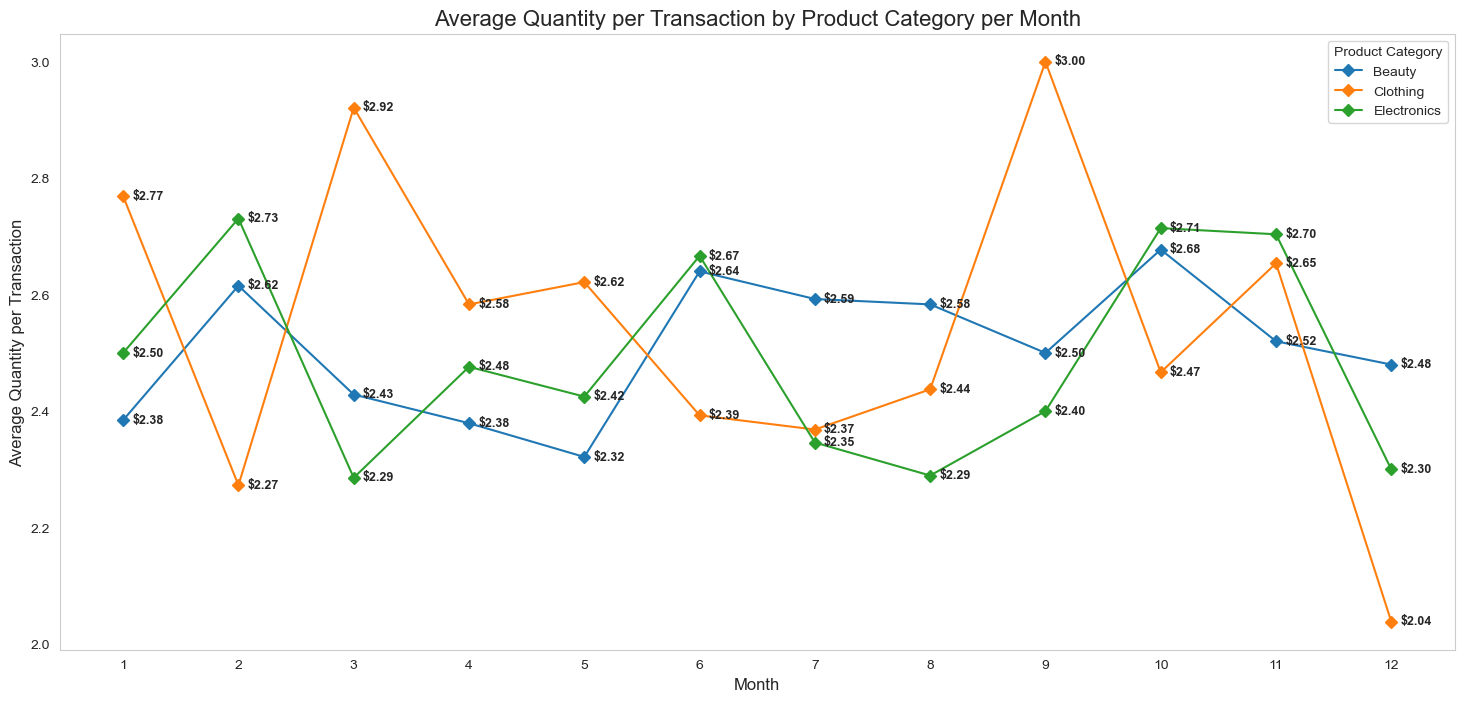

In [113]:
sns.set_style("whitegrid")
plt.figure(figsize=(18,8))

for product in avg_qty_month_product['Product Category'].unique():
    product_data = avg_qty_month_product[avg_qty_month_product['Product Category'] == product]
    
    # Plot line without markers
    plt.plot(product_data['Month'], product_data['Avg_Quantity'], label=product, marker="D")
    
    # Annotate highest point
    max_idx = product_data['Avg_Quantity'].idxmax()
    max_month = product_data.loc[max_idx, 'Month']
    max_val = product_data.loc[max_idx, 'Avg_Quantity']
    #plt.annotate(f"{max_val:.2f}", 
                # xy=(max_month, max_val),
                # xytext=(0, 5), 
                # textcoords='offset points',
                # ha='center', va='bottom',
               #  fontsize=10, color='black',
               #  fontweight='bold') 
    
    # Annotate lowest point
    min_idx = product_data['Avg_Quantity'].idxmin()
    min_month = product_data.loc[min_idx, 'Month']
    min_val = product_data.loc[min_idx, 'Avg_Quantity']
    #plt.annotate(f"{min_val:.2f}", 
                # xy=(min_month, min_val),
                # xytext=(0, -10), 
               #  textcoords='offset points',
                # ha='center', va='top',
                # fontsize=10, color='black',
                # fontweight='bold')

#Add numbers BESIDE each marker
    for x, y in zip(product_data['Month'], product_data['Avg_Quantity']):
        plt.text(
            x + 0.08,          # shift right
            y,
            f"${y:.2f}",
            ha='left',
            va='center',
            fontsize=9,
            fontweight='bold'
        )


plt.title('Average Quantity per Transaction by Product Category per Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Quantity per Transaction', fontsize=12)
plt.xticks(range(1,13))
plt.legend(title='Product Category')
plt.grid(False)
plt.show()

In [120]:
# we get our Pricing Summany

price_summary = Df.groupby('Price per Unit').agg(
    Total_Revenue=('Total Amount', 'sum'),
    Total_Transactions=('Transaction ID', 'nunique'),
    Avg_Quantity=('Quantity', 'mean')
).reset_index()

print("Pricing Summary Table")
display(price_summary)

Pricing Summary Table


,Price per Unit,Total_Revenue,Total_Transactions,Avg_Quantity
0,25,13050,210,2.485714
1,30,13350,183,2.431694
2,50,26700,211,2.530806
3,300,155400,197,2.629442
4,500,247500,199,2.487437


In [126]:
#Aggregate metrics by Price per Unit and Product Category
price_product_summary = Df.groupby(['Price per Unit', 'Product Category']).agg(
    Total_Revenue=('Total Amount', 'sum'),
    Total_Transactions=('Transaction ID', 'nunique'),
    Avg_Quantity=('Quantity', 'mean')
).reset_index()

revenue_pivot = price_product_summary.pivot(index='Price per Unit', columns='Product Category', values='Total_Revenue')
revenue_pivot = revenue_pivot.fillna(0)  # fill missing values
revenue_pivot = revenue_pivot.applymap(lambda x: f"${x:,.0f}")  # format as currency

print()
print("Total Revenue per Product by Price")
display(revenue_pivot)


Total Revenue per Product by Price


Product Category,Beauty,Clothing,Electronics
Price per Unit,,,
25,"$3,925","$4,600","$4,525"
30,"$3,990","$5,130","$4,230"
50,"$8,500","$9,450","$8,750"
300,"$42,600","$57,900","$54,900"
500,"$84,500","$78,500","$84,500"


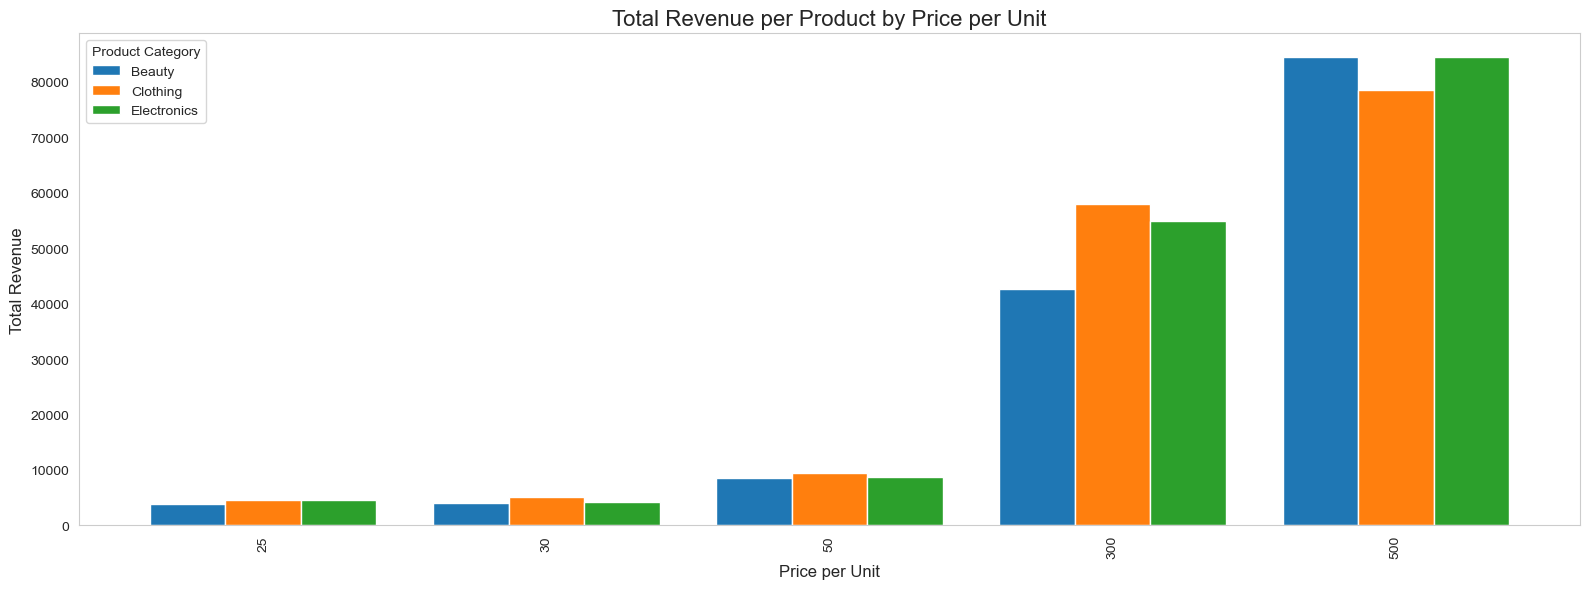

In [128]:
# Numeric pivot (for plotting)
revenue_pivot_num = price_product_summary.pivot(
    index='Price per Unit',
    columns='Product Category',
    values='Total_Revenue'
).fillna(0)


revenue_pivot_num.plot(
    kind='bar',
    figsize=(16,6),
    width=0.8
)

plt.title('Total Revenue per Product by Price per Unit', fontsize=16)
plt.xlabel('Price per Unit', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.legend(title='Product Category')
plt.grid(False)
plt.tight_layout()
plt.show()